# 12. Machine learning techniques

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/ML_in_practice

[WinError 3] The system cannot find the path specified: 'machine_learning_1/ML_in_practice'
C:\Users\yusef


'git' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import random as rd
rd.seed(0)

In [3]:
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



## 12.1 Loading and exploring the dataset

First, we use pandas to load the dataset from a csv file.

In [4]:
# use pabdas to read './titanic.csv'

raw_data =pd.read_csv("titanic_data (1).csv")
raw_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
1305,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
1306,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
1307,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


Next, we can explore the dataset.

In [5]:
# Use pandas to examine some info of the dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [6]:
# Use pandas to examine the description of the dataset
raw_data.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.383838
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.486592
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [7]:
# categorical features
raw_data.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


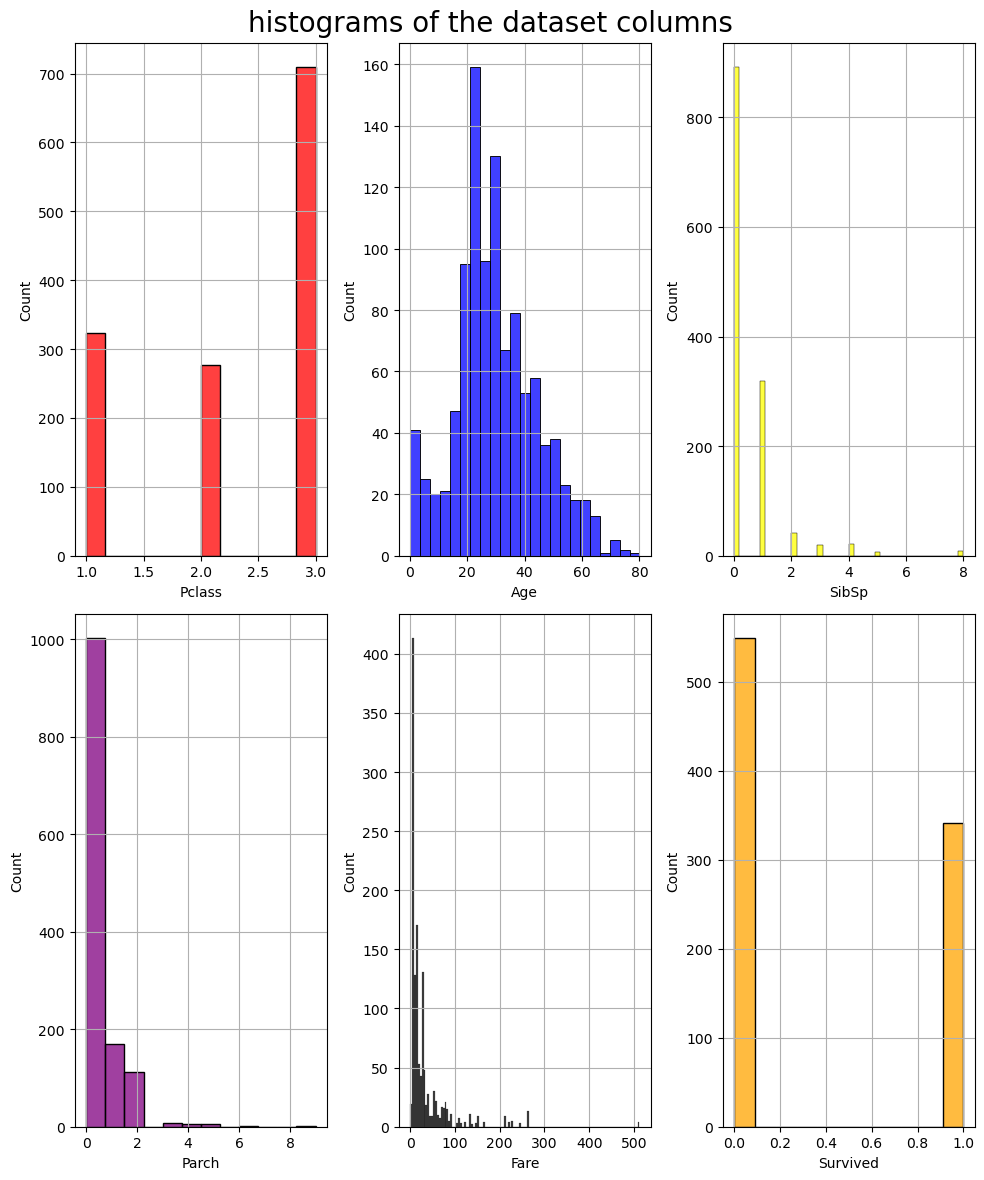

In [8]:
# Use pandas to examine the histograms of the dataset columns
fig= plt.figure(figsize=(10,12))

plt.subplot(2,3,1)
sns.histplot(raw_data['Pclass'],color='red')
plt.xlabel("Pclass")
plt.grid()

plt.subplot(2,3,2)
sns.histplot(raw_data['Age'],color='blue')
plt.xlabel("Age")
plt.grid()

plt.subplot(2,3,3)
sns.histplot(raw_data['SibSp'],color='yellow')
plt.xlabel("SibSp")
plt.grid()

plt.subplot(2,3,4)
sns.histplot(raw_data['Parch'],color='purple')
plt.xlabel("Parch")
plt.grid()

plt.subplot(2,3,5)
sns.histplot(raw_data['Fare'],color='black')
plt.xlabel("Fare")
plt.grid()

plt.subplot(2,3,6)
sns.histplot(raw_data['Survived'],color='orange')
plt.xlabel("Survived")
plt.grid()

plt.suptitle("histograms of the dataset columns " ,fontsize = 20 )
plt.tight_layout()


In [9]:
# Use pandas to examine "survived" column (labels)
labels= raw_data["Survived"]
labels

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1304    0.0
1305    1.0
1306    0.0
1307    1.0
1308    0.0
Name: Survived, Length: 1309, dtype: float64

In [10]:
# Use pandas to exanine more than one column at the same time ["Name", "Age"]
Name_age=raw_data[["Name", "Age"]]
Name_age

,Name,Age
0,"Kelly, Mr. James",34.5
1,"Wilkes, Mrs. James (Ellen Needs)",47.0
2,"Myles, Mr. Thomas Francis",62.0
3,"Wirz, Mr. Albert",27.0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0
...,...,...
1304,"Montvila, Rev. Juozas",27.0
1305,"Graham, Miss. Margaret Edith",19.0
1306,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
1307,"Behr, Mr. Karl Howell",26.0


In [11]:
# Use pandas to check how many passengers survived
print('survived passengers=', (raw_data["Survived"].value_counts()[1]))


survived passengers= 342


In [12]:
# the important columns ["Survived"],['Pclass'],['SibSp'],["Sex"],
raw_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
raw_data[['Pclass','Survived']].groupby('Pclass',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
raw_data[['SibSp','Survived']].groupby('SibSp',as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
raw_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
1305,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
1306,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
1307,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


In [16]:
raw_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000
7,9,NaN


E:\Anaconda\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
E:\Anaconda\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
E:\Anaconda\Anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
E:\Anaconda\Anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
E:\Anaconda\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


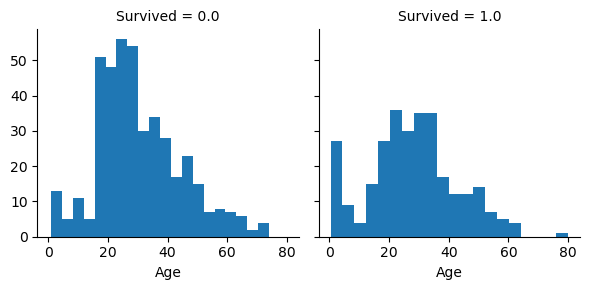

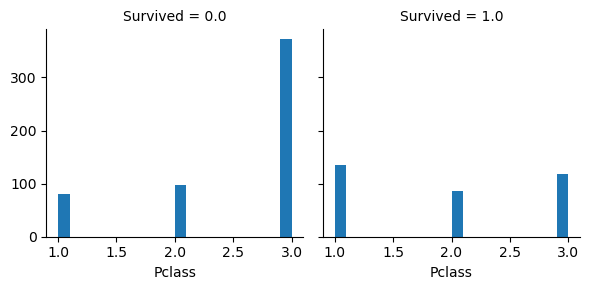

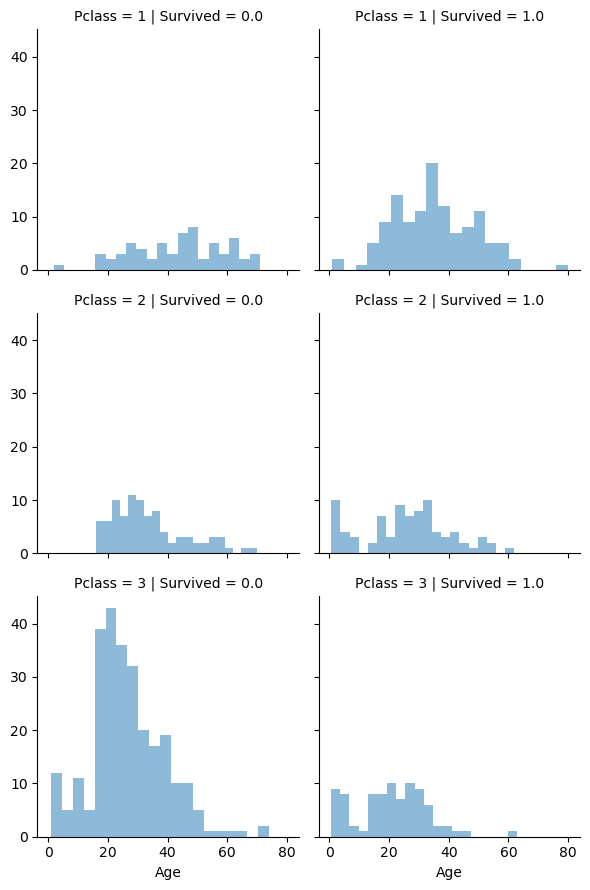

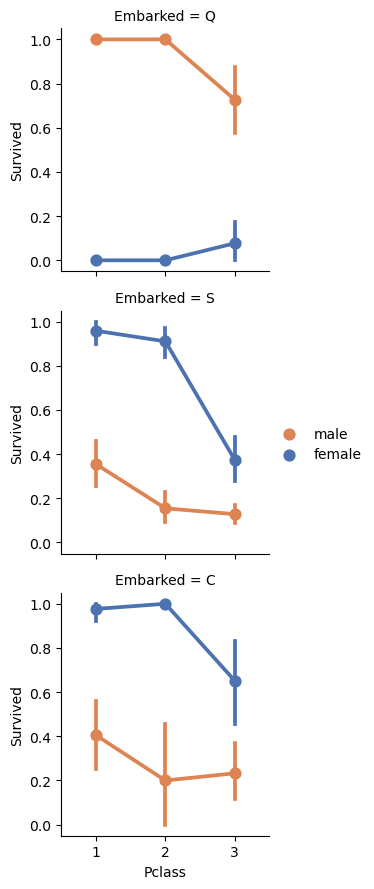

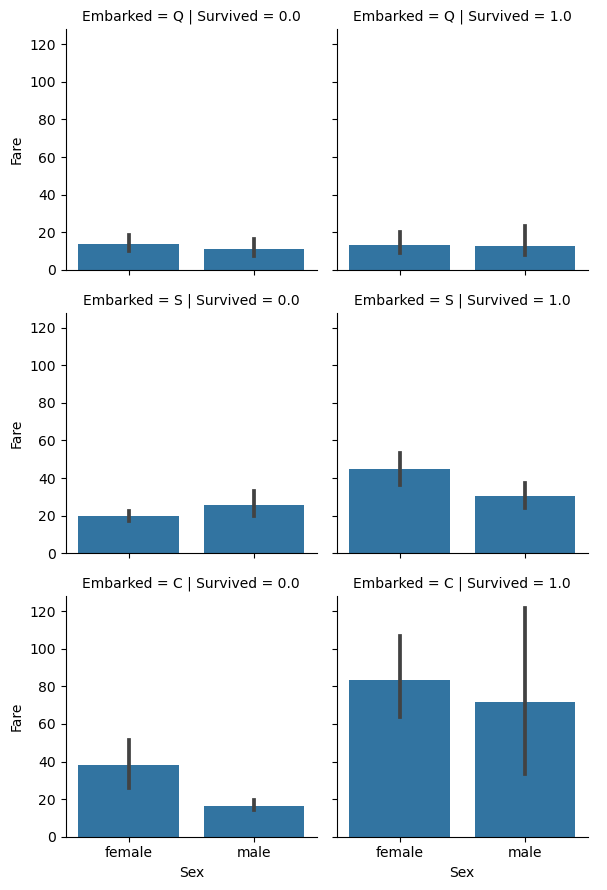

In [17]:
# visulaization
g= sns.FacetGrid(data=raw_data ,col="Survived")
g.map(plt.hist ,'Age',bins=20)

c=sns.FacetGrid(data=raw_data, col="Survived")
c.map(plt.hist,"Pclass",bins=20)

f=sns.FacetGrid(data=raw_data, col="Survived" , row='Pclass')
f.map(plt.hist,"Age",alpha=.5,bins=20)

k=sns.FacetGrid(data=raw_data, row="Embarked")
k.map(sns.pointplot,"Pclass","Survived","Sex",palette='deep')
k.add_legend()

d=sns.FacetGrid(data=raw_data,col='Survived',row="Embarked")
d.map(sns.barplot,"Sex","Fare")
d.add_legend()



## 12.2. Cleaning up the data

Now, let's look at how many columns have missing data

In [18]:
# use pandas to check missing data (NA(not available) values) for all the columns

mis=raw_data.isnull().sum().sort_values(ascending=False)
percent=(raw_data.isnull().sum())/(raw_data.isnull().count()).sort_values(ascending=False)

mis_data=pd.concat([mis,percent],axis=1,keys=['total','parcent'])
mis_data.head(6)

,total,parcent
Cabin,1014,0.774637
Survived,418,0.319328
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764
PassengerId,0,0.000000


In [19]:
print("The Cabin column is missing", sum(raw_data['Cabin'].isna()), "values out of",len(raw_data['Cabin']))

The Cabin column is missing 1014 values out of 1309


The Cabin column is missing too many values to be useful. Let's drop it altogether.

In [20]:
# Use pandas to drop "Cabin" column
clean_data=raw_data.drop('Cabin',axis=1)

In [21]:
clean_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0.0
1305,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1.0
1306,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0.0
1307,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1.0


Other columns such as Age or Embarked are missing some values, but they can still be useful.

For the age column, let's fill in the missing values with the median of all ages.

For the Embarked column, let's make a new category called 'U', for Unknown port of embarkment.

In [22]:
# get the median of age column using pandas
median_age =raw_data.Age.median()
median_age


28.0

In [23]:
# use pandas to fill the na values in age column with the median age
clean_data["Age"] = clean_data["Age"].fillna(median_age)


In [24]:
# use pandas to fill the na values in embarked column with 'U'
clean_data["Embarked"] =clean_data["Embarked"].fillna('U')

<Axes: xlabel='Fare'>

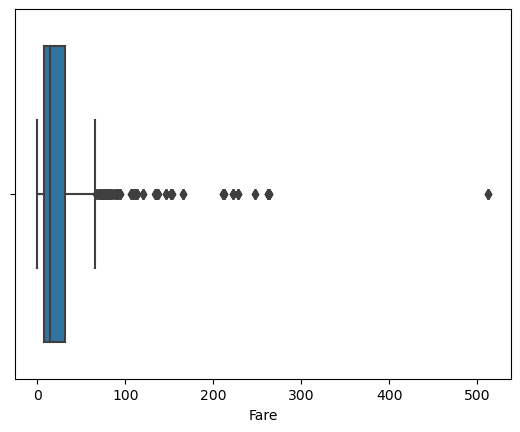

In [25]:
sns.boxplot(data=clean_data,x='Fare')

In [26]:
# get the median of Fare column using pandas
median_fare=clean_data["Age"].median()

Q1=clean_data["Age"].quantile (0.25)
Q3=clean_data["Age"].quantile (0.75)
QIR=Q3-Q1
print("shape of data(before)",clean_data.shape )
clean_data=clean_data[~((clean_data["Age"]<(Q1-1.5*QIR))| (clean_data["Age"]>(Q3+1.5*QIR)))]  
print("shape of data(after)",clean_data.shape )

shape of data(before) (1309, 11)
shape of data(after) (1208, 11)


In [27]:
clean_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,NaN
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0.0
1305,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1.0
1306,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,0.0
1307,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1.0


In [28]:
# use pandas to fill the na values in Fare column with the median Fare
median_fare=clean_data["Fare"].median()
clean_data["Fare"]=clean_data["Fare"].fillna(median_fare)

C:\Users\yusef\AppData\Local\Temp\ipykernel_15232\892386893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["Fare"]=clean_data["Fare"].fillna(median_fare)


In [29]:
# get the median of Survived column using pandas

S=clean_data["Survived"].mode()[0]


In [30]:
# use pandas to fill the na values in Survived column with the median Survived

clean_data["Survived"]=clean_data["Survived"].fillna(S)

C:\Users\yusef\AppData\Local\Temp\ipykernel_15232\4007090630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["Survived"]=clean_data["Survived"].fillna(S)


In [31]:
clean_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [32]:
# view 10 rows of the clean dataset
clean_data.head(10)
clean_data.shape

(1208, 11)

C:\Users\yusef\AppData\Local\Temp\ipykernel_15232\2201575424.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=clean_data.corr()


<Axes: >

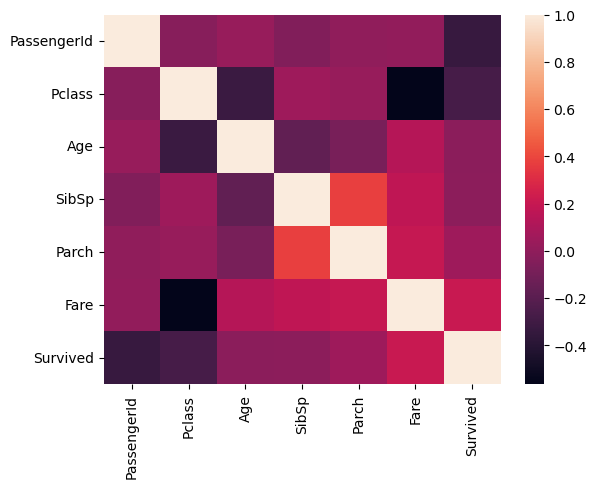

In [33]:
#correlation
corr=clean_data.corr()
sns.heatmap(data=corr)

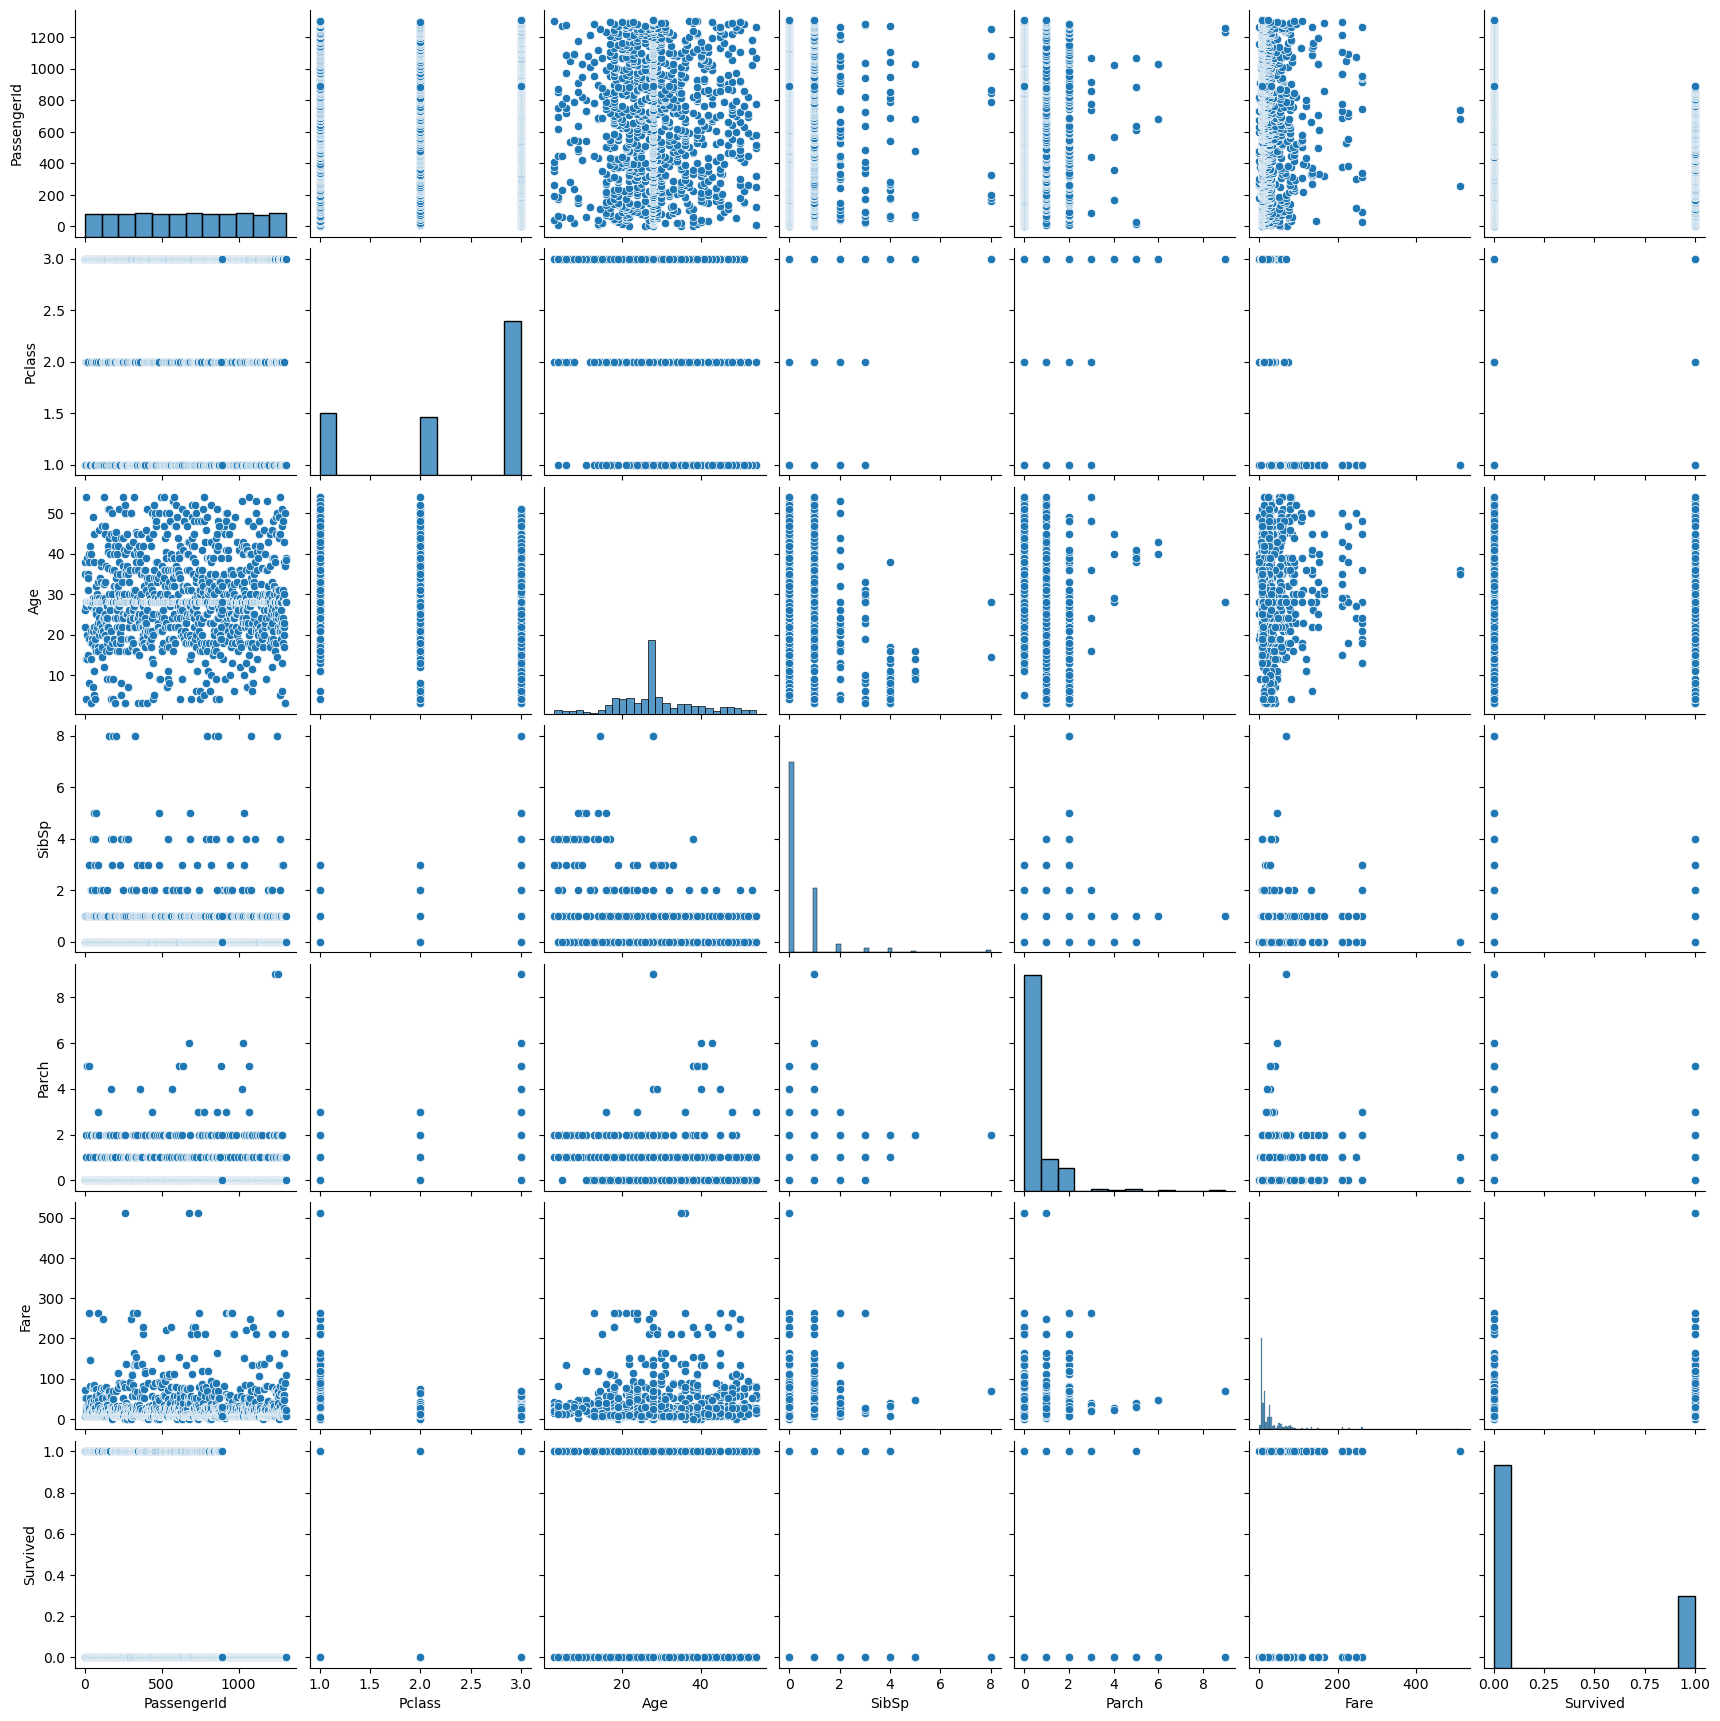

In [34]:
sns.pairplot(clean_data)

### 12.2.3 Saving our data for the future

In [35]:
# save the clean dataset to './clean_titanic_data.csv'
clean_data.to_csv('./clean_titanic_data.csv', index=None)

## 12.3 Manipulating the features

- One-hot encoding
- Binning
- Feature selection

### 12.3.1 One-hot encoding

In [36]:
preprocessed_data = pd.read_csv('clean_titanic_data.csv')
preprocessed_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0.0
2,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0.0
3,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0.0
4,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1203,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0.0
1204,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1.0
1205,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,0.0
1206,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1.0


In [37]:
# Use  one hot encoding of “embarked”, “pclass” and “gender”
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder()

encoded_data1 = encoder.fit_transform(preprocessed_data[["Embarked", "Sex" , "Pclass"]]).toarray()
encoded_data1=pd.DataFrame(encoded_data1,columns=encoder.get_feature_names_out())



In [38]:
# Use pandas method .drop() to remove the old columns and method .concat() to add the new columns
preprocessed_data=preprocessed_data.drop(["Embarked", "Sex" , "Pclass"],axis=1)
preprocessed_data=pd.concat([preprocessed_data,encoded_data1],axis=1)

In [39]:
preprocessed_data

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,897,"Svensson, Mr. Johan Cervin",14.0,0,0,7538,9.2250,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,887,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1204,888,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1205,889,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1206,890,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### 12.3.2 Binning

In [40]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
# Use .cut() method to make bins from the age column

categorized_age =pd.cut(preprocessed_data["Age"],bins=bins)
preprocessed_data['Categorized_age'] = categorized_age
preprocessed_data = preprocessed_data.drop(["Age"], axis=1)
preprocessed_data

,PassengerId,Name,SibSp,Parch,Ticket,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Categorized_age
0,892,"Kelly, Mr. James",0,0,330911,7.8292,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,"(30, 40]"
1,893,"Wilkes, Mrs. James (Ellen Needs)",1,0,363272,7.0000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,"(40, 50]"
2,895,"Wirz, Mr. Albert",0,0,315154,8.6625,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,"(20, 30]"
3,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,3101298,12.2875,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,"(20, 30]"
4,897,"Svensson, Mr. Johan Cervin",0,0,7538,9.2250,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,"(10, 20]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,887,"Montvila, Rev. Juozas",0,0,211536,13.0000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,"(20, 30]"
1204,888,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,"(10, 20]"
1205,889,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,"(20, 30]"
1206,890,"Behr, Mr. Karl Howell",0,0,111369,30.0000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,"(20, 30]"


In [41]:
# Use one hot encoding of “Categorized_age”
from sklearn.preprocessing import OneHotEncoder
Encoder=OneHotEncoder()
encoded_data2=Encoder.fit_transform(preprocessed_data[['Categorized_age']]).toarray()
encoded_data2=pd.DataFrame(encoded_data2,columns=Encoder.get_feature_names_out())


In [42]:
preprocessed_data=pd.concat([encoded_data2,preprocessed_data],axis=1)

In [43]:
preprocessed_data

,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]",PassengerId,Name,SibSp,Parch,...,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Categorized_age
0,0.0,0.0,0.0,1.0,0.0,0.0,892,"Kelly, Mr. James",0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,"(30, 40]"
1,0.0,0.0,0.0,0.0,1.0,0.0,893,"Wilkes, Mrs. James (Ellen Needs)",1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,"(40, 50]"
2,0.0,0.0,1.0,0.0,0.0,0.0,895,"Wirz, Mr. Albert",0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,"(20, 30]"
3,0.0,0.0,1.0,0.0,0.0,0.0,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,"(20, 30]"
4,0.0,1.0,0.0,0.0,0.0,0.0,897,"Svensson, Mr. Johan Cervin",0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,"(10, 20]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,0.0,0.0,1.0,0.0,0.0,0.0,887,"Montvila, Rev. Juozas",0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,"(20, 30]"
1204,0.0,1.0,0.0,0.0,0.0,0.0,888,"Graham, Miss. Margaret Edith",0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,"(10, 20]"
1205,0.0,0.0,1.0,0.0,0.0,0.0,889,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,"(20, 30]"
1206,0.0,0.0,1.0,0.0,0.0,0.0,890,"Behr, Mr. Karl Howell",0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,"(20, 30]"


### 12.3.4 Feature selection

In [44]:
# drop these columns['Name', 'Ticket', 'PassengerId']

preprocessed_data=preprocessed_data.drop(['Name', 'Ticket', 'PassengerId'],axis=1)

preprocessed_data.head()



,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]",SibSp,Parch,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Categorized_age
0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,7.8292,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,"(30, 40]"
1,0.0,0.0,0.0,0.0,1.0,0.0,1,0,7.0000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,"(40, 50]"
2,0.0,0.0,1.0,0.0,0.0,0.0,0,0,8.6625,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,"(20, 30]"
3,0.0,0.0,1.0,0.0,0.0,0.0,1,1,12.2875,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,"(20, 30]"
4,0.0,1.0,0.0,0.0,0.0,0.0,0,0,9.2250,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,"(10, 20]"


In [45]:
preprocessed_data=preprocessed_data.drop('Categorized_age',axis=1)


In [46]:
preprocessed_data

,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]",SibSp,Parch,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,7.8292,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1,0,7.0000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0,0,8.6625,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1,1,12.2875,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0,0,9.2250,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,0.0,0.0,1.0,0.0,0.0,0.0,0,0,13.0000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1204,0.0,1.0,0.0,0.0,0.0,0.0,0,0,30.0000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1205,0.0,0.0,1.0,0.0,0.0,0.0,1,2,23.4500,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1206,0.0,0.0,1.0,0.0,0.0,0.0,0,0,30.0000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### 12.3.5 Saving for future use

In [47]:
preprocessed_data.to_csv('./preprocessed_titanic_data.csv', index=None)

# 12.4 Training models

In [48]:
data = pd.read_csv('./preprocessed_titanic_data.csv')
data.head()


,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]",SibSp,Parch,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,7.8292,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1,0,7.0000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0,0,8.6625,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1,1,12.2875,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0,0,9.2250,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [49]:
from sklearn.preprocessing import MinMaxScaler


# # Create an instance of the StandardScaler
scaler = MinMaxScaler()

# # Fit the scaler on the column to be scaled
scaler.fit_transform(data[['Fare']])

# # Perform scaling on the column
# data['Fare'] = scaler.transform(data[['Fare']])



array([[0.01528158],
       [0.01366309],
       [0.01690807],
       ...,
       [0.04577135],
       [0.0585561 ],
       [0.01512699]])

### 12.4.1 Features-labels split and train-validation split

In [52]:
# drop ["Survived"] column and save that to features
features =data.drop('Survived',axis=1)

# save the ["Survived"] column to labels
labels =data['Survived']


0.0    894
1.0    314
Name: Survived, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.4, random_state=100)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2, random_state=100)

In [71]:
from imblearn.over_sampling import RandomOverSampler
oversampler=RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(features,labels)

In [76]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(X_val))
print(len(X_resampled))
print(len(y_resampled))


579
484
579
145
1788
1788


In [94]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=100, penalty='l2').fit(X_resampled, y_resampled)


E:\Anaconda\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
# Train decision tree model 
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=20, min_samples_leaf= 1,min_samples_split= 2).fit(X_resampled, y_resampled)


In [96]:
# Train SVM model
from sklearn.svm import SVC

svm_model = SVC(C =10,  kernel= 'rbf').fit(X_resampled, y_resampled)


In [97]:
# Train random forest model 
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(min_samples_leaf= 1,max_depth=20,min_samples_split= 2, n_estimators= 100).fit(X_resampled, y_resampled)


In [98]:
# Train gradient boosting model 
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 100, subsample= 0.8).fit(X_resampled, y_resampled)




In [103]:
from sklearn.neighbors import KNeighborsClassifier
neighbors=KNeighborsClassifier(n_neighbors=1).fit(X_resampled, y_resampled)


### 12.4.3 Evaluating the models

#### Accuracy

In [113]:
# print accuracy of each model on validation data
print("*"*50)

print("Scores of the models")
print("*"*50)

print("Logistic regression:",lr_model.score(X_val, y_val))

print("*"*50)

print("Decision tree:",dt_model.score(X_val, y_val))

print("*"*50)

print("SVM:",svm_model.score(X_val, y_val))

print("*"*50)

print("Random forest:",rf_model.score(X_val, y_val))

print("*"*50)
print("Gradient boosting:",gb_model.score(X_val, y_val))

print("*"*50)

print("NearestNeighbors",neighbors.score(X_val, y_val))



**************************************************
Scores of the models
**************************************************
Logistic regression: 0.7655172413793103
**************************************************
Decision tree: 0.9241379310344827
**************************************************
SVM: 0.7517241379310344
**************************************************
Random forest: 0.9310344827586207
**************************************************
Gradient boosting: 0.8206896551724138
**************************************************
NearestNeighbors 0.9103448275862069


#### F1-score

In [105]:

from sklearn.metrics import f1_score

from sklearn.metrics import f1_score

print("F1-scores of the models:")

lr_predicted_labels = lr_model.predict(X_val)
print("Logistic regression:", f1_score(y_val, lr_predicted_labels))

dt_predicted_labels = dt_model.predict(X_val)
print("Decision Tree:", f1_score(y_val, dt_predicted_labels))

svm_predicted_labels = svm_model.predict(X_val)
print("Support Vector Machine:", f1_score(y_val, svm_predicted_labels))

rf_predicted_labels = rf_model.predict(X_val)
print("Random Forest:", f1_score(y_val, rf_predicted_labels))

gb_predicted_labels = gb_model.predict(X_val)
print("Gradient boosting:", f1_score(y_val, gb_predicted_labels))

NearestNeighbors=neighbors.predict(X_val)
print("NearestNeighbors",f1_score(y_val,NearestNeighbors))


F1-scores of the models:
Logistic regression: 0.6222222222222222
Decision Tree: 0.8674698795180723
Support Vector Machine: 0.6086956521739131
Random Forest: 0.8809523809523809
Gradient boosting: 0.7173913043478262
NearestNeighbors 0.8059701492537312


# Confusion Matrix 

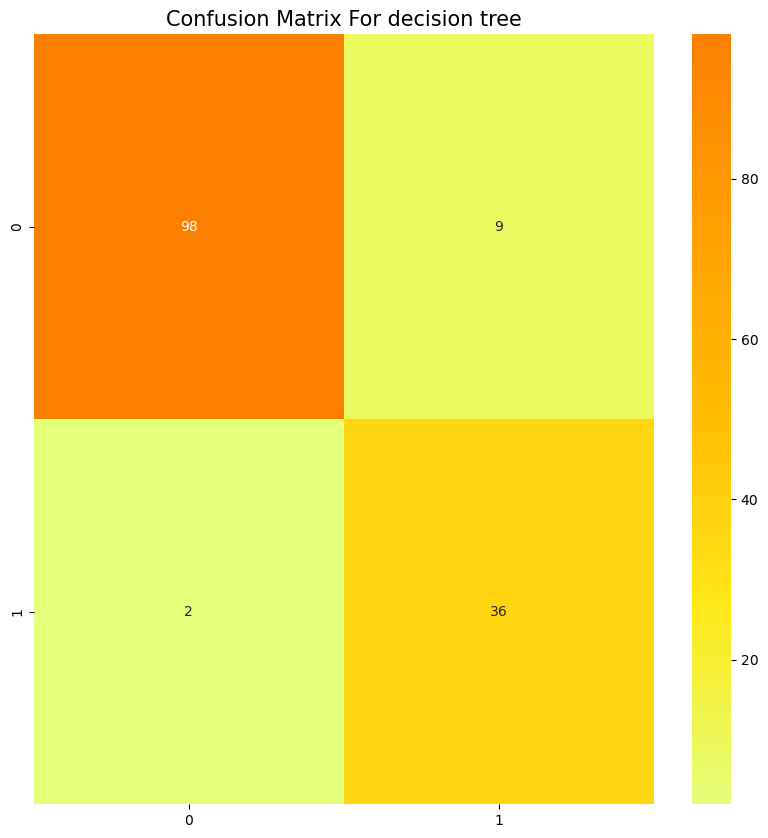

In [108]:
#Evaluating the model performance
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_val,dt_predicted_labels )
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix For DecisionTreeClassifier', fontsize = 15)
plt.show()

In [107]:
#Defining the classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_val, dt_predicted_labels)
print(cr)

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       107
         1.0       0.80      0.95      0.87        38

    accuracy                           0.92       145
   macro avg       0.89      0.93      0.91       145
weighted avg       0.93      0.92      0.93       145



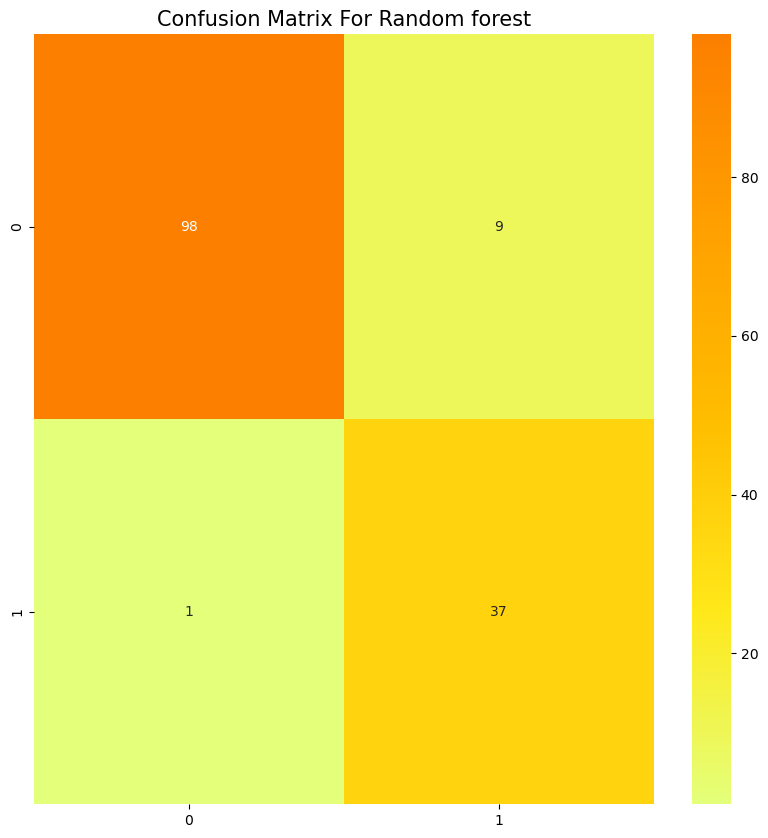

In [111]:
#Evaluating the model performance
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_val, rf_predicted_labels)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix For Random forest', fontsize = 15)
plt.show()

In [110]:
#Defining the classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_val, rf_predicted_labels)
print(cr)

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       107
         1.0       0.80      0.97      0.88        38

    accuracy                           0.93       145
   macro avg       0.90      0.94      0.92       145
weighted avg       0.94      0.93      0.93       145



# 12.5 Grid search

In [93]:
from sklearn.model_selection import GridSearch



# Logistic Regression
logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
logistic_grid = GridSearchCV(LogisticRegression(), logistic_params, cv=5)
logistic_grid.fit(X_resampled, y_resampled)
print("Logistic Regression Best Parameters:", logistic_grid.best_params_)

# Decision Tree
tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5)
tree_grid.fit(X_resampled, y_resampled)
print("Decision Tree Best Parameters:", tree_grid.best_params_)

# Support Vector Machine (SVM)
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5)
svm_grid.fit(X_resampled, y_resampled)
print("SVM Best Parameters:", svm_grid.best_params_)

# Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid.fit(X_resampled, y_resampled)
print("Random Forest Best Parameters:", rf_grid.best_params_)

# Gradient Boosting
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'subsample': [0.8, 1.0]}
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=5)
gb_grid.fit(X_resampled, y_resampled)
print("Gradient Boosting Best Parameters:", gb_grid.best_params_)


E:\Anaconda\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Best Parameters: {'C': 100, 'penalty': 'l2'}
Decision Tree Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
SVM Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Random Forest Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Gradient Boosting Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}


In [102]:
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# قم بتحديد GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=5)

grid_search.fit(X_resampled, y_resampled)

print("Best n_neighbors:", grid_search.best_params_['n_neighbors'])


Best n_neighbors: 1


# 12.6 Cross validation

# 12.7 Save the model

In [ ]:
# use joblib to save the model
